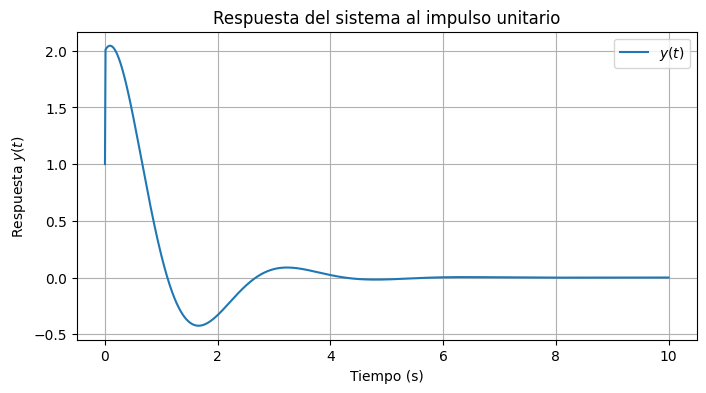

In [1]:
import sympy as sp
import numpy as np
import matplotlib.pyplot as plt

t, s = sp.symbols('t s')
m, b, k = sp.symbols('m b k', real=True, positive=True)

Y_s = (b*s + k) / (m*s**2 + b*s + k)

#  la transformada inversa de Laplace
y_t = sp.inverse_laplace_transform(Y_s, s, t)

y_t_func = sp.lambdify((t, m, b, k), y_t, 'numpy')

# Parámetros arbitrarios
m_val = 1   # kg
b_val = 2   # ns/m
k_val = 5   # nn/m

t_vals = np.linspace(0, 10, 1000)
y_vals = y_t_func(t_vals, m_val, b_val, k_val)

plt.figure(figsize=(8, 4))
plt.plot(t_vals, y_vals, label=r'$y(t)$')
plt.xlabel('Tiempo (s)')
plt.ylabel('Respuesta $y(t)$')
plt.title('Respuesta del sistema al impulso unitario')
plt.legend()
plt.grid()
plt.show()


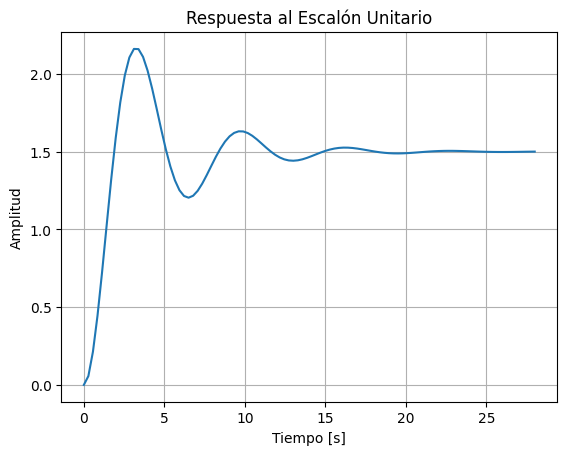

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import lti, step

m = 1.0  # masa
b = 0.5  # coeficiente de amortiguamiento
h = 1.0  # constante del resorte

numerador = [b + h]
denominador = [m, b, h]

sistema = lti(numerador, denominador)

t, y = step(sistema)

plt.plot(t, y)
plt.title('Respuesta al Escalón Unitario')
plt.xlabel('Tiempo [s]')
plt.ylabel('Amplitud')
plt.grid(True)
plt.show()

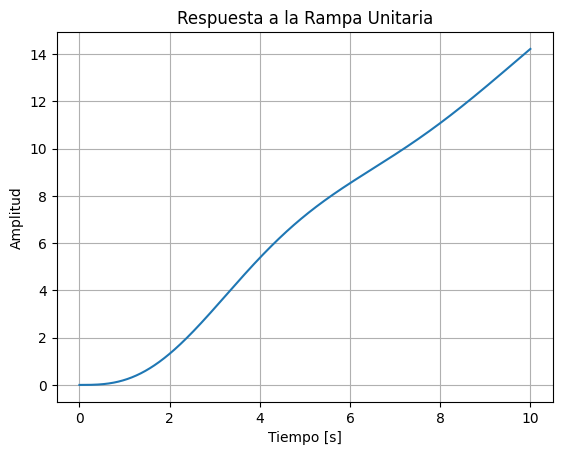

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import lti, lsim

m = 1.0  # masa
b = 0.5  # coeficiente de amortiguamiento
h = 1.0  # constante del resorte

numerador = [b + h]
denominador = [m, b, h]

sistema = lti(numerador, denominador)

t = np.linspace(0, 10, 1000)

u = t

t, y, _ = lsim(sistema, u, t)

plt.plot(t, y)
plt.title('Respuesta a la Rampa Unitaria')
plt.xlabel('Tiempo [s]')
plt.ylabel('Amplitud')
plt.grid(True)
plt.show()